In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt 

tweets = pd.read_csv('combined.csv', encoding='utf-8')

In [2]:
tweets = tweets.drop(['tweet_date_created'], axis=1)
tweets.head(5)

,tweet_id,tweet_text,language,sentiment,sentiment_score
0,993767246437666816,Bayer Leverkusen goalkeeper Bernd Leno will no...,en,NEUTRAL,"{""Neutral"":0.7228581905364990234375,""Negative""..."
1,1013866900772835331,Gary Speed v Blackburn at St James in 2001/02 ...,en,NEUTRAL,"{""Neutral"":0.998256266117095947265625,""Negativ..."
2,1037323043360657408,@ChelseaFC Don't make him regret it and start ...,en,NEUTRAL,"{""Neutral"":0.912796199321746826171875,""Negativ..."
3,993803266323550208,"@LiverpoolFF @AnfieldEdition He's a liar, made...",en,NEGATIVE,"{""Neutral"":0.3271420896053314208984375,""Negati..."
4,1026732168226267136,@theesk @Everton Didn't realise Kenwright is d...,en,NEUTRAL,"{""Neutral"":0.957906246185302734375,""Negative"":..."


In [3]:
duplicates = tweets[tweets.duplicated(subset=['tweet_id'], keep=False)]

if not duplicates.empty:
    print(f"Found {len(duplicates)} duplicate tweet ids. Removing duplicates...")
    tweets.drop_duplicates(subset=['tweet_id'], inplace=True)
else:
    print("No duplicate tweet ids found.")

Found 762643 duplicate tweet ids. Removing duplicates...


In [4]:
tweets = tweets.drop(['sentiment_score'], axis=1)
tweets.head(5)

,tweet_id,tweet_text,language,sentiment
0,993767246437666816,Bayer Leverkusen goalkeeper Bernd Leno will no...,en,NEUTRAL
1,1013866900772835331,Gary Speed v Blackburn at St James in 2001/02 ...,en,NEUTRAL
2,1037323043360657408,@ChelseaFC Don't make him regret it and start ...,en,NEUTRAL
3,993803266323550208,"@LiverpoolFF @AnfieldEdition He's a liar, made...",en,NEGATIVE
4,1026732168226267136,@theesk @Everton Didn't realise Kenwright is d...,en,NEUTRAL


In [5]:
tweets = tweets.dropna()
print(tweets.isnull().sum())

tweet_id      0
tweet_text    0
language      0
sentiment     0
dtype: int64


In [6]:
all_english = (tweets['language'] == 'en').all()


if all_english:
    print("All values in the 'language' column are 'en'")
else:
    print("Not all values in the 'language' column are 'en'")

All values in the 'language' column are 'en'


In [7]:
tweets = tweets.drop(['language'], axis=1)
tweets.head(5)

,tweet_id,tweet_text,sentiment
0,993767246437666816,Bayer Leverkusen goalkeeper Bernd Leno will no...,NEUTRAL
1,1013866900772835331,Gary Speed v Blackburn at St James in 2001/02 ...,NEUTRAL
2,1037323043360657408,@ChelseaFC Don't make him regret it and start ...,NEUTRAL
3,993803266323550208,"@LiverpoolFF @AnfieldEdition He's a liar, made...",NEGATIVE
4,1026732168226267136,@theesk @Everton Didn't realise Kenwright is d...,NEUTRAL


In [8]:
tweets = tweets.drop(['tweet_id'], axis=1)
tweets.head(5)

,tweet_text,sentiment
0,Bayer Leverkusen goalkeeper Bernd Leno will no...,NEUTRAL
1,Gary Speed v Blackburn at St James in 2001/02 ...,NEUTRAL
2,@ChelseaFC Don't make him regret it and start ...,NEUTRAL
3,"@LiverpoolFF @AnfieldEdition He's a liar, made...",NEGATIVE
4,@theesk @Everton Didn't realise Kenwright is d...,NEUTRAL


In [9]:
# Get all unique sentiment values in the 'sentiment' column
unique_sentiments = tweets['sentiment'].unique()

# Print the unique sentiment values
print("Unique sentiment values in the 'sentiment' column:")
for sentiment in unique_sentiments:
    print(sentiment)

Unique sentiment values in the 'sentiment' column:
NEUTRAL
NEGATIVE
POSITIVE
MIXED


In [10]:
# Define a dictionary that maps sentiment labels to numeric values
sentiment_map = {"NEUTRAL": 0, "POSITIVE": 1, "MIXED": 2, "NEGATIVE": -1}

# Map the sentiment labels to their numeric values
tweets['sentiment_values'] = tweets['sentiment'].map(sentiment_map)

# Print the new column that contains the mapped values
print(tweets['sentiment_values'])

0          0
1          0
2          0
3         -1
4          0
          ..
5393957    0
5393958   -1
5393959    0
5393960    0
5393961    0
Name: sentiment_values, Length: 5012534, dtype: int64


In [11]:
tweets.head(5)

,tweet_text,sentiment,sentiment_values
0,Bayer Leverkusen goalkeeper Bernd Leno will no...,NEUTRAL,0
1,Gary Speed v Blackburn at St James in 2001/02 ...,NEUTRAL,0
2,@ChelseaFC Don't make him regret it and start ...,NEUTRAL,0
3,"@LiverpoolFF @AnfieldEdition He's a liar, made...",NEGATIVE,-1
4,@theesk @Everton Didn't realise Kenwright is d...,NEUTRAL,0


In [11]:
tweets = tweets.drop(['sentiment'], axis=1)
tweets.head(5)

,tweet_text,sentiment_values
0,Bayer Leverkusen goalkeeper Bernd Leno will no...,0
1,Gary Speed v Blackburn at St James in 2001/02 ...,0
2,@ChelseaFC Don't make him regret it and start ...,0
3,"@LiverpoolFF @AnfieldEdition He's a liar, made...",-1
4,@theesk @Everton Didn't realise Kenwright is d...,0


In [12]:
tweets['sentiment_values']=tweets['sentiment_values'].replace(-1, 3)
tweets.head(5)

,tweet_text,sentiment_values
0,Bayer Leverkusen goalkeeper Bernd Leno will no...,0
1,Gary Speed v Blackburn at St James in 2001/02 ...,0
2,@ChelseaFC Don't make him regret it and start ...,0
3,"@LiverpoolFF @AnfieldEdition He's a liar, made...",3
4,@theesk @Everton Didn't realise Kenwright is d...,0


In [13]:
# Find the indices of rows with Mixed sentiment
mixed_indices = tweets[tweets['sentiment_values'] == 2].index

# Delete the rows with Mixed sentiment
tweets = tweets.drop(mixed_indices)

# Print the resulting DataFrame
print(tweets.head())

                                          tweet_text  sentiment_values
0  Bayer Leverkusen goalkeeper Bernd Leno will no...                 0
1  Gary Speed v Blackburn at St James in 2001/02 ...                 0
2  @ChelseaFC Don't make him regret it and start ...                 0
3  @LiverpoolFF @AnfieldEdition He's a liar, made...                 3
4  @theesk @Everton Didn't realise Kenwright is d...                 0


In [14]:
positive_tweets = tweets[tweets['sentiment_values'] == 1]
negative_tweets = tweets[tweets['sentiment_values'] == 3]
neutral_tweets = tweets[tweets['sentiment_values'] == 0]
mixed_tweets = tweets[tweets['sentiment_values'] == 2]

print('No of positive tagged tweets is: {}'.format(len(positive_tweets)))
print('No of negative tagged tweets is: {}'.format(len(negative_tweets)))
print('No of neutral tagged tweets is: {}'.format(len(neutral_tweets)))
print('No of mixed tagged tweets is: {}'.format(len(mixed_tweets)))

No of positive tagged tweets is: 1070334
No of negative tagged tweets is: 354501
No of neutral tagged tweets is: 3549918
No of mixed tagged tweets is: 0


In [15]:
import pandas as pd

# Shuffle the DataFrame to ensure that the downsampling is random
tweets = tweets.sample(frac=1, random_state=42)

# Count the number of tweets in each sentiment class
counts = tweets['sentiment_values'].value_counts()

# Find the smallest class size
smallest_size = counts.min()

# Downsample each class to the smallest size
positive_tweets = tweets[tweets['sentiment_values'] == 1].sample(n=smallest_size, random_state=42)
negative_tweets = tweets[tweets['sentiment_values'] == 3].sample(n=smallest_size, random_state=42)
neutral_tweets = tweets[tweets['sentiment_values'] == 0].sample(n=smallest_size, random_state=42)

# Concatenate the downsampled DataFrames
tweets = pd.concat([positive_tweets, negative_tweets, neutral_tweets], ignore_index=True)

# Print the new counts of tweets in each class
print('No of positive tagged tweets is: {}'.format(len(tweets[tweets['sentiment_values'] == 1])))
print('No of negative tagged tweets is: {}'.format(len(tweets[tweets['sentiment_values'] == 3])))
print('No of neutral tagged tweets is: {}'.format(len(tweets[tweets['sentiment_values'] == 0])))


No of positive tagged tweets is: 354501
No of negative tagged tweets is: 354501
No of neutral tagged tweets is: 354501


In [16]:
tweets['tweet_text'] = tweets['tweet_text'].astype('str')

In [18]:
import re
from nltk.corpus import stopwords

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove whitespace
    text = text.strip()
    # Remove stopwords and join the words in a single string
    #text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [17]:
import re
import string 
import pandas as pd
import nltk 
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')

# Add custom stopwords
#custom_stopwords = ['dont', 'shouldve', 'arent', 'couldnt', 'didnt', 'doesnt', 'hadnt', 'havent', 'mustnt', 'shouldnt', 'wasnt', 'werent', 
#                    'wont', 'wouldnt']
#english_stopwords.extend(custom_stopwords)

def preprocess_text(text):
    # Get the default NLTK English stopwords
    
    # List of words to keep
    words_to_keep = {"off", "over", "under", "few", "more", "no", "not", "don't", "should", "should've", "aren't", 
                     "couldn't", "didn't", "doesn't", "hadn't", "haven't", "mustn't", "shouldn't", "wasn't", "weren't",
                     "won't", "wouldn't"}

    custom_stopwords = english_stopwords - words_to_keep
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove whitespace
    text = text.strip()
    # Remove custom stopwords and join the words in a single string
    text = ' '.join([word for word in text.split() if word not in custom_stopwords])
    
    return text


In [18]:
import pandas as pd
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Apply the preprocessing function to the 'text' column
tweets['processed_text'] = tweets['tweet_text'].apply(preprocess_text)

tweets =  shuffle(tweets).reset_index(drop=True)

TypeError: unsupported operand type(s) for -: 'list' and 'set'

Custom stopwords

In [19]:
def preprocess_text(text):
    # Get the default NLTK English stopwords
    
    # List of words to keep
    words_to_keep = {"off", "over", "under", "few", "more", "no", "not", "don't", "should", "should've", "aren't", 
                     "couldn't", "didn't", "doesn't", "hadn't", "haven't", "mustn't", "shouldn't", "wasn't", "weren't",
                     "won't", "wouldn't"}

    # Convert english_stopwords to a set, perform the subtraction, and convert the result back to a list
    custom_stopwords = list(set(english_stopwords) - words_to_keep)

    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove whitespace
    text = text.strip()
    # Remove custom stopwords and join the words in a single string
    text = ' '.join([word for word in text.split() if word not in custom_stopwords])
    
    return text

import pandas as pd
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Apply the preprocessing function to the 'text' column
tweets['processed_text'] = tweets['tweet_text'].apply(preprocess_text)

tweets =  shuffle(tweets).reset_index(drop=True)


In [20]:
tweets.head()

,tweet_text,sentiment_values,processed_text
0,@Annmariolsen All I thought was that I wish Gi...,1,thought wish giggsy still team form wished all...
1,"Newcastle are a joke, fans must be fuming, cla...",3,newcastle joke fans must fuming claim no money...
2,@kirksavage @WayneRooney Sshhh ? @dcunited are...,0,sshhh american team
3,@_TrueBlueNews @ChelseaFC @rubey_lcheek I thin...,1,think well chelsea showing good business terms...
4,@SkySportsNews @ManUtd Must be a slow news day...,3,must slow news day breaking news


In [23]:
tokenized_tweet=tweets['processed_text'].apply(lambda x: x.split())
tokenized_tweet.head(5)

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweets['processed_text'].values.astype('U'))

tweets.head(5)

,tweet_text,sentiment_values,processed_text
0,Its an absolute disgrace @Arsenal that this m...,3,its an absolute disgrace that this man is all...
1,Think can believe Jorgensen is decent .@premie...,0,think can believe jorgensen is decent standar...
2,@refmillerafc @CheckatradeTrpy @Arsenal Can't ...,3,cant wait tbh mate shame we didnt get a nice l...
3,@DanielPoynter9 @LFC Not judging at all! I hop...,1,not judging at all i hope it was out of passio...
4,@BBCMOTD Best game: France - Argentina 4-3\n\n...,0,best game france argentina 43\n\nbest goal be...


In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import nltk
import dill

In [22]:
# Split the dataset into input (X) and output (y)
X = tweets['processed_text'].values
y = tweets['sentiment_values'].values

# Split the dataset into 70% training and 30% combined validation and testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary dataset (30% of the entire dataset) into 50% validation and 50% testing
# This results in 15% validation and 15% testing of the entire dataset
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training data size:", len(X_train))
print("Validation data size:", len(X_val))
print("Testing data size:", len(X_test))

Training data size: 744452
Validation data size: 159525
Testing data size: 159526


In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
import dill

text_clf = Pipeline([
    ('vect', CountVectorizer(max_features=None, ngram_range=(1,2))),
    ('clf', MultinomialNB(alpha=0.1))
])

params = {
    'vect__ngram_range': [(1,1), (1,2), (2,2), (1,3)],
    'vect__max_features': [1000, 5000, 10000, None],
    'clf__alpha': [0.01, 0.1, 0.5, 1.0, 10.0]
}

grid_search = GridSearchCV(text_clf, params, cv=10, n_jobs=1, scoring='accuracy')
 
grid_search.fit(X_val.tolist(), y_val)

# Print the mean test scores and corresponding hyperparameter combinations
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Mean accuracy: {:.4f} | Hyperparameters: {}".format(mean_score, params))

print("Best parameters: ", grid_search.best_params_)

# Train the model with the best hyperparameters on the entire training set
best_clf = grid_search.best_estimator_
best_clf.fit(X_train.tolist(), y_train)

y_pred = best_clf.predict(X_test.tolist())
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.4f}".format(accuracy))


Mean accuracy: 0.6921 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (1, 1)}
Mean accuracy: 0.6677 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (1, 2)}
Mean accuracy: 0.5658 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (2, 2)}
Mean accuracy: 0.6643 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (1, 3)}
Mean accuracy: 0.7314 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}
Mean accuracy: 0.7147 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (1, 2)}
Mean accuracy: 0.6246 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (2, 2)}
Mean accuracy: 0.7104 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (1, 3)}
Mean accuracy: 0.7338 | Hyperparameters: {'clf__

Accuracy: 0.7397
Classification Report:
               precision    recall  f1-score   support

           0     0.7402    0.5583    0.6365     53000
           1     0.7625    0.7976    0.7797     53214
           3     0.7195    0.8622    0.7844     53312

    accuracy                         0.7397    159526
   macro avg     0.7407    0.7394    0.7335    159526
weighted avg     0.7407    0.7397    0.7337    159526

Confusion Matrix:
        0      1      3
0  29590  10500  12910
1   5759  42445   5010
3   4624   2722  45966


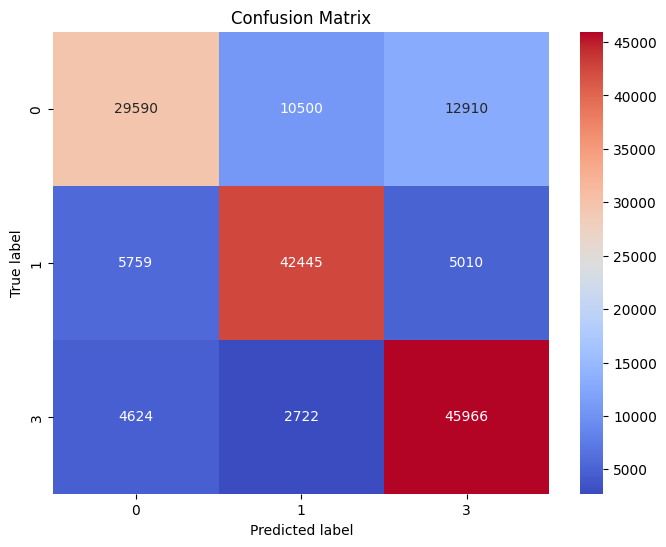

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4f}".format(accuracy))

# Precision, Recall, F1 score
report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a DataFrame
labels = sorted(set(y_test))
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n", cm_df)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='coolwarm')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
import dill


text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('clf', MultinomialNB())
])

params = {
    'tfidf__max_features': [None, 5000, 10000],
    'clf__alpha': [0.1, 0.5, 1.0, 10.0],
    #'tfidf__min_df': [1, 2],
    #'tfidf__max_df': [0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (2,2)],
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2'],
    'clf__fit_prior': [True, False]
}

grid_search = GridSearchCV(text_clf, params, cv=10, n_jobs=1, scoring='accuracy')
grid_search.fit(X_val.tolist(), y_val)

# Print the mean test scores and corresponding hyperparameter combinations
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Mean accuracy: {:.4f} | Hyperparameters: {}".format(mean_score, params))

print("Best parameters: ", grid_search.best_params_)

# Train the model with the best hyperparameters on the entire training set
best_clf = grid_search.best_estimator_
best_clf.fit(X_train.tolist(), y_train)

y_pred = best_clf.predict(X_test.tolist())
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.4f}".format(accuracy))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)
4

Mean accuracy: 0.7285 | Hyperparameters: {'clf__alpha': 0.1, 'clf__fit_prior': True, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 1), 'tfidf__norm': 'l1', 'tfidf__use_idf': True}
Mean accuracy: 0.7386 | Hyperparameters: {'clf__alpha': 0.1, 'clf__fit_prior': True, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 1), 'tfidf__norm': 'l1', 'tfidf__use_idf': False}
Mean accuracy: 0.7166 | Hyperparameters: {'clf__alpha': 0.1, 'clf__fit_prior': True, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 1), 'tfidf__norm': 'l2', 'tfidf__use_idf': True}
Mean accuracy: 0.7352 | Hyperparameters: {'clf__alpha': 0.1, 'clf__fit_prior': True, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 1), 'tfidf__norm': 'l2', 'tfidf__use_idf': False}
Mean accuracy: 0.7409 | Hyperparameters: {'clf__alpha': 0.1, 'clf__fit_prior': True, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2), 'tfidf__norm': 'l1', 'tfidf__use_idf': True}
Mean accuracy: 0.7409 | Hyperparameters: {'clf__alpha

# SPECIFIC TF-IDF PARAMETERS

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
import dill

text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=None, norm='l1', use_idf=True)),
    ('clf', MultinomialNB(alpha=0.5, fit_prior=True))
])

text_clf.fit(X_train.tolist(), y_train)

y_pred = text_clf.predict(X_val.tolist())
accuracy = accuracy_score(y_val, y_pred)

print("Accuracy on test data: {:.4f}".format(accuracy))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_val, y_pred)
print("Classification Report:\n", cr)


Accuracy on test data: 0.7559
Confusion Matrix:
 [[31821  9492 11551]
 [ 6315 42881  4227]
 [ 4798  2561 45879]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.60      0.66     52864
           1       0.78      0.80      0.79     53423
           3       0.74      0.86      0.80     53238

    accuracy                           0.76    159525
   macro avg       0.76      0.76      0.75    159525
weighted avg       0.76      0.76      0.75    159525



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
import dill

text_clf = Pipeline([
    ('vect', CountVectorizer(max_features=None, ngram_range=(1,2))),
    ('clf', MultinomialNB(alpha=0.1))
])

params = {
    'vect__ngram_range': [(1,1), (1,2), (2,2), (1,3)],
    'vect__max_features': [1000, 5000, 10000, None],
    'clf__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid_search = GridSearchCV(text_clf, params, cv=5, n_jobs=1)
 
grid_search.fit(X_train.tolist(), y_train)

# Print the mean test scores and corresponding hyperparameter combinations
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Mean accuracy: {:.4f} | Hyperparameters: {}".format(mean_score, params))

print("Best parameters: ", grid_search.best_params_)

y_pred = grid_search.predict(X_test.tolist())
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.4f}".format(accuracy))


Mean accuracy: 0.6899 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (1, 1)}
Mean accuracy: 0.6664 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (1, 2)}
Mean accuracy: 0.5251 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (2, 2)}
Mean accuracy: 0.6630 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (1, 3)}
Mean accuracy: 0.7328 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}
Mean accuracy: 0.7155 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (1, 2)}
Mean accuracy: 0.6061 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (2, 2)}
Mean accuracy: 0.7104 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (1, 3)}
Mean accuracy: 0.7391 | Hyperparameters: {'clf__

Tri-grams Hyper-Parameter Tuning

In [27]:
from numba import jit, cuda
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from scipy.stats import uniform
import nltk
import dill

# Define the pipeline 
text_clf = Pipeline([
    ('vect', CountVectorizer()), 
    ('tfidf', TfidfTransformer()), 
    ('clf', MultinomialNB())
])

# Define the hyperparameters for GridSearchCV
params = {
    'vect__ngram_range': [(1,1), (1,2), (1,3), (2,2)],
    'vect__max_features': [1000, 5000, 10000, None],
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2'],
    'clf__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(text_clf, params, cv=10, n_jobs=1, scoring='accuracy')
grid_search.fit(X_val.tolist(), y_val)

# Print the mean test scores and corresponding hyperparameter combinations
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Mean accuracy: {:.4f} | Hyperparameters: {}".format(mean_score, params))

print("Best parameters: ", grid_search.best_params_)

# Train the classifier with the best hyperparameters
best_params = grid_search.best_params_

# Train the classifier with the best hyperparameters
text_clf1 = Pipeline([
    ('vect', CountVectorizer(ngram_range=best_params['vect__ngram_range'], max_features=best_params['vect__max_features'])), 
    ('tfidf', TfidfTransformer(use_idf=best_params['tfidf__use_idf'], norm=best_params['tfidf__norm'])),
    ('clf', MultinomialNB(alpha=best_params['clf__alpha']))
])

text_clf1.fit(X_train, y_train)

from sklearn.metrics import classification_report

# Evaluate the classifier on the test set
y_pred = text_clf1.predict(X_test.tolist())
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

Original Final Hyper-Parameter Model

In [26]:
# from numba import jit, cuda
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import FunctionTransformer
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords
# import string
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform
# import nltk
# import dill

# # Define the pipeline 
# text_clf = Pipeline([
#     ('vect', CountVectorizer()), # This step converts the collection of text into a matrix of token counts. It creates a vocabulary of all the unique words in the corpus and assigns a numerical value to each word.
#     ('tfidf', TfidfTransformer()), # This step converts the raw term frequency matrix generated by CountVectorizer into a normalized term frequency-inverse document frequency (TF-IDF) representation.
#     ('clf', MultinomialNB())
# ])

# # Define the hyperparameters for RandomizedSearchCV
# params = {
#     'vect__ngram_range': [(1,1), (1,2), (1,3), (2,2)],
#     'vect__max_features': [1000, 5000, 10000, None],
#     'tfidf__use_idf': [True, False],
#     'tfidf__norm': ['l1', 'l2'],
#     'clf__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
# }

# # # Perform randomized search to find the best hyperparameters
# # random_search = RandomizedSearchCV(text_clf, params, cv=5, n_iter=50, n_jobs=1, random_state=19)
# # random_search.fit(X_train.tolist(), y_train)

# random_search2 = RandomizedSearchCV(text_clf, params, cv=10, n_iter=10, n_jobs=1, random_state=42)  # Change random_state
# random_search2.fit(X_train.tolist(), y_train)

# # Print the mean test scores and corresponding hyperparameter combinations
# for mean_score, params in zip(random_search2.cv_results_['mean_test_score'], random_search2.cv_results_['params']):
#     print("Mean accuracy: {:.4f} | Hyperparameters: {}".format(mean_score, params))

# print("Best parameters: ", random_search2.best_params_)

KeyboardInterrupt: 

In [ ]:
# from numba import jit, cuda
# import spacy
# import numpy as np
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import cross_val_score
# from sklearn.naive_bayes import MultinomialNB

# nlp = spacy.load('en_core_web_sm')

# # Define the set of best parameters
# best_params = {'vect__ngram_range': (1,2), 'vect__max_features': None, 'tfidf__use_idf': True, 'tfidf__norm': 'l1', 'clf__alpha': 1.0}

# # Define a custom transformer for part-of-speech tagging
# class POSTagger:
#     def transform(self, X):
#         return [self.tag_text(text) for text in X]
    
#     def tag_text(self, text):
#         doc = nlp(text)
#         return ' '.join([token.pos_ for token in doc])

#     def fit(self, X, y=None):
#         return self

# # Train and evaluate the classifier using part-of-speech tagging
# text_clf = Pipeline([
#     ('pos_tagger', POSTagger()),
#     ('vect', CountVectorizer()),
#     ('tfidf', TfidfTransformer()),
#     ('clf', MultinomialNB(alpha=best_params['clf__alpha']))
# ])

# scores = cross_val_score(text_clf, X_train, y_train, cv=5, scoring='accuracy')
# print("Accuracy scores with part-of-speech tagging: ", scores)
# print("Mean accuracy with part-of-speech tagging: ", np.mean(scores))

# # Save the model using dill

# import dill

# filename = 'my_model.pkl'
# with open(filename, 'wb') as file:
#     dill.dump(text_clf, file)


In [ ]:
# import numpy as np
# from sklearn.model_selection import cross_val_score

# # Define the first set of best parameters
# best_params1 = {'vect__ngram_range': (1,3), 'vect__max_features': None, 'tfidf__use_idf': True, 'tfidf__norm': 'l1', 'clf__alpha': 1.0}

# # Define the second set of best parameters
# best_params2 = {'clf__alpha': 0.651484771857788, 'tfidf__use_idf': True, 'vect__max_df': 0.8, 'vect__max_features': None, 'vect__min_df': 3, 'vect__ngram_range': (1,2)}

# # Train and evaluate the classifier using the first set of best parameters
# text_clf1 = Pipeline([
#     ('vect', CountVectorizer(ngram_range=best_params1['vect__ngram_range'], max_features=best_params1['vect__max_features'])), 
#     ('tfidf', TfidfTransformer(use_idf=best_params1['tfidf__use_idf'], norm=best_params1['tfidf__norm'])),
#     ('clf', MultinomialNB(alpha=best_params1['clf__alpha']))
# ])

# scores1 = cross_val_score(text_clf1, X_train, y_train, cv=5, scoring='accuracy')
# print("Accuracy scores with best parameters 1: ", scores1)
# print("Mean accuracy with best parameters 1: ", np.mean(scores1))

# # Fit the model with the whole training set
# text_clf1.fit(X_train, y_train)

# # # Save the model to a file
# # filename = 'naive_bayes_modelFinal.sav'
# # dill.dump(text_clf1, open(filename, 'wb'))

# from sklearn.metrics import classification_report

# # Evaluate the classifier on the test set
# y_pred = text_clf1.predict(X_test.tolist())  # Change text_clf to text_clf1
# accuracy = accuracy_score(y_test, y_pred)

# # Print the classification report
# print(classification_report(y_test, y_pred))

# # # Train and evaluate the classifier using the second set of best parameters
# # text_clf2 = Pipeline([
# #     ('vect', CountVectorizer(ngram_range=best_params2['vect__ngram_range'], min_df=best_params2['vect__min_df'], 
# #                               max_df=best_params2['vect__max_df'], max_features=best_params2['vect__max_features'])),
# #     ('tfidf', TfidfTransformer(use_idf=best_params2['tfidf__use_idf'])),
# #     ('clf', MultinomialNB(alpha=best_params2['clf__alpha']))
# # ])

# # scores2 = cross_val_score(text_clf2, X_train, y_train, cv=10, scoring='accuracy')
# # print("Accuracy scores with best parameters 2: ", scores2)
# # print("Mean accuracy with best parameters 2: ", np.mean(scores2))


In [ ]:
# import joblib
# pipeline = joblib.load('nbmodelwithdifferenthp2.sav')

# import pandas as pd

# # Read CSV file into a pandas DataFrame
# df = pd.read_csv('SampleTweets.csv')

# # Extract preprocessed text data as a list
# preprocessed_data = df['processed_text'].tolist()

# predictions = pipeline.predict(preprocessed_data)

# for text, prediction in zip(preprocessed_data, predictions):
#     print(f'Text: {text} | Prediction: {prediction}')